In [72]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [73]:
#input1
df1 = pd.read_csv('train.csv')
df1

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English
...,...,...,...,...,...,...,...,...,...,...,...
795,M3VVKDII,155187570,57120,19298,2647,179420,132867,4071398,1,0,Italian
796,H4RDC7MS,154982550,87945,7136,1711,245715,122045,3621969,1,1,Portuguese
797,3OR62HLN,154727730,94275,6213,1605,114154,32991,3059244,1,0,Spanish
798,Y7UCJJTF,154595850,85635,8533,1777,120494,28322,3446723,1,0,Spanish


In [74]:
#input2
df2 = pd.read_csv('test.csv')
df2

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,Partnered,Mature,Language
0,97R8L3J0,154332060,27105,29983,5864,308815,8255635,0,0,Russian
1,6UV44QFF,154277370,87375,9437,1759,151886,3019137,1,1,French
2,2WKQZUGR,154125945,77475,9460,2106,411346,4832180,1,0,Turkish
3,R4DGVX2D,153988380,83325,11200,1787,272635,4345590,1,0,French
4,P8YSNIOI,153963765,110910,14329,1281,106365,1449834,1,1,English
...,...,...,...,...,...,...,...,...,...,...
195,8Q556ABI,122524635,13560,21359,9104,601927,2162107,1,0,Spanish
196,AXQ2XZ45,122523705,153000,3940,793,213212,4399897,1,0,Korean
197,AP7UE7SZ,122452320,217410,6431,567,109068,3417970,1,0,Korean
198,PNCBWRE4,122311065,104745,10543,1153,547446,3926918,1,0,English


In [75]:
#add one more feature for higher accuracty: Average view-to-Follower ratio
df1['view_follower_ratio'] = df1['Average viewers'] / df1['Followers']
df2['view_follower_ratio'] = df2['Average viewers'] / df2['Followers']

In [76]:
#filter outliers 
from scipy import stats

df1_filter= df1[(np.abs(stats.zscore(df1[df1.columns[1:6]])) < 3).all(axis=1)]
df1_filter



,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,view_follower_ratio
17,9LAS59DS,2186662470,181230,26999,12201,494445,92205,34405975,1,0,Korean,0
19,TDZPYPFP,2029212570,175230,43615,11343,1264808,124242,38718674,1,0,English,0
20,LHXWW0WZ,1943299035,153720,34830,12367,434200,137215,19645967,1,0,English,0
22,8RU2QRMK,1845157080,100215,125133,17779,2411995,550678,22672980,1,0,English,0
26,Q0BYOO6G,1690237110,135675,123796,12868,1792625,383130,38499423,1,0,Portuguese,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,M3VVKDII,155187570,57120,19298,2647,179420,132867,4071398,1,0,Italian,0
796,H4RDC7MS,154982550,87945,7136,1711,245715,122045,3621969,1,1,Portuguese,0
797,3OR62HLN,154727730,94275,6213,1605,114154,32991,3059244,1,0,Spanish,0
798,Y7UCJJTF,154595850,85635,8533,1777,120494,28322,3446723,1,0,Spanish,0


### exploration of the data

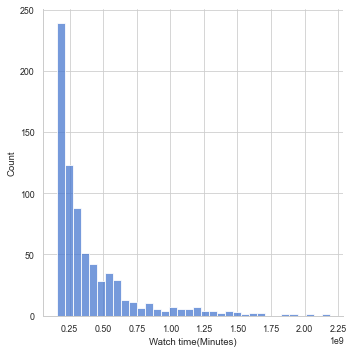

In [77]:
sns.displot(df1_filter['Watch time(Minutes)'])

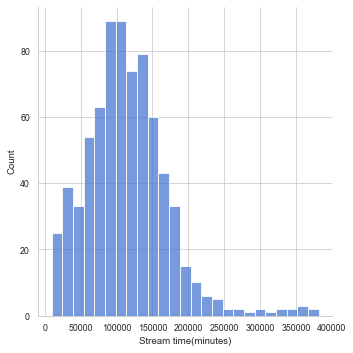

In [78]:
sns.displot(df1_filter['Stream time(minutes)'])

In [79]:
# see whether they follow 

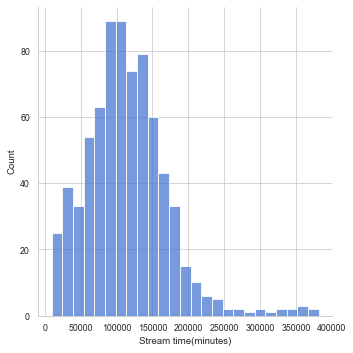

In [80]:
sns.displot(df1_filter['Stream time(minutes)'])

In [81]:
#pearson correlation coefficient
corr = df1_filter.corr(method = 'pearson')
print(corr)

                      Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
Watch time(Minutes)                     1                     0             0   
Stream time(minutes)                    0                     1            -0   
Peak viewers                            0                    -0             1   
Average viewers                         1                    -0             1   
Followers                               0                    -0             0   
Followers gained                        0                    -0             0   
Views gained                            1                     0             0   
Partnered                              -0                    -0             0   
Mature                                 -0                     0            -0   
view_follower_ratio                     0                    -0             0   

                      Average viewers  Followers  Followers gained  \
Watch time(Minutes)                 1 

<AxesSubplot:>

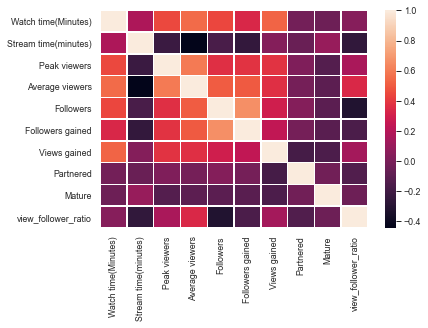

In [82]:
#heatmap 
import seaborn as sns
sns.set(context = 'paper', style = 'whitegrid', palette = 'muted', font_scale = 1, color_codes = True, rc = None)
sns.heatmap(corr, linewidths = .5)

<AxesSubplot:xlabel='Followers gained'>

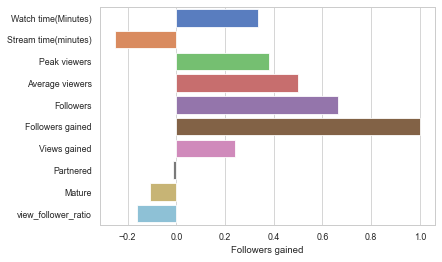

In [83]:
#to observe the correlation betweem 'Followers gained' and other variables
sns.barplot(x = corr['Followers gained'], y = corr.columns)

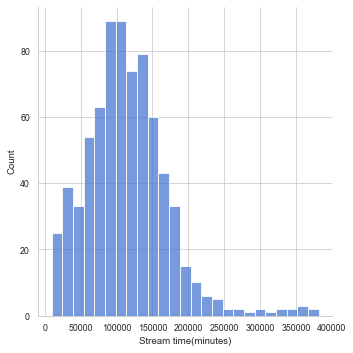

In [84]:
sns.displot(df1_filter['Stream time(minutes)'])

### data preprocessing

In [85]:
#check the existence of the null values in the data
df1_filter.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
view_follower_ratio     0
dtype: int64

In [86]:
#checking dtypes of each column
print(df1_filter.dtypes)
print(df2.dtypes)

Channel                  object
Watch time(Minutes)       int64
Stream time(minutes)      int64
Peak viewers              int64
Average viewers           int64
Followers                 int64
Followers gained          int64
Views gained              int64
Partnered                 int64
Mature                    int64
Language                 object
view_follower_ratio     float64
dtype: object
Channel                  object
Watch time(Minutes)       int64
Stream time(minutes)      int64
Peak viewers              int64
Average viewers           int64
Followers                 int64
Views gained              int64
Partnered                 int64
Mature                    int64
Language                 object
view_follower_ratio     float64
dtype: object


In [87]:
df1_filter.describe().T #stats of the test data

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),734,"393,877,236","312,159,847","154,524,165","195,594,191","279,934,268","468,710,872","2,186,662,470"
Stream time(minutes),734,"114,310","57,502","9,555","77,415","109,132","144,904","381,735"
Peak viewers,734,"31,325","34,070","2,008","10,558","18,772","38,122","234,826"
Average viewers,734,"4,164","3,948",465,"1,745","2,762","4,991","29,414"
Followers,734,"521,886","498,879","28,818","195,051","348,136","659,404","3,135,667"
Followers gained,734,"191,176","253,006","-15,772","48,457","106,853","235,642","2,220,765"
Views gained,734,"10,652,320","11,000,596","175,788","4,795,040","7,355,486","12,705,005","115,312,954"
Partnered,734,1,0,0,1,1,1,1
Mature,734,0,0,0,0,0,0,1
view_follower_ratio,734,0,0,0,0,0,0,0


In [88]:
# ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'no_view_follower_ratio'] should be X inputs
X = df1_filter[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
       'Average viewers', 'Followers', 'view_follower_ratio']]
y = df1_filter['Followers gained']

In [89]:
print(X.shape)
print(y.shape)

(734, 6)
(734,)


In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#define X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [91]:
#preprocessing step
scaler = StandardScaler().fit(X_train)
X_train_scaled1 = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test_scaled1 = scaler.transform(X_test)

In [92]:
X_train_scaled1.shape

(587, 6)

In [93]:
#df2-related preprocessing step 
ex_input = df2[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
       'Average viewers', 'Followers', 'view_follower_ratio']]
#ex_input = ex_input.to_numpy()
ex_scaler = StandardScaler().fit(ex_input)
ex_input_scaled1 = ex_scaler.transform(ex_input)

In [94]:
ex_input_scaled1.shape

(200, 6)

### using minmaxscaler() for data pre-processing

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler().fit(X_train)
X_train_scaled2 = scaler2.transform(X_train)

scaler2 = MinMaxScaler().fit(X_test)
X_test_scaled2 = scaler2.transform (X_test)

ex_scaler2 = MinMaxScaler().fit(ex_input)
ex_input_scaled2 = ex_scaler2.transform(ex_input)

### 1) linear regression

In [96]:
#import libraries related to ilnear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#### train the model (using standardscaler() ) 

In [97]:
lr =   LinearRegression().fit(X_train_scaled1, y_train)
pred = lr.predict(X_test_scaled1)

print('r2 score: ', str(r2_score(y_test, pred)))
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, pred)))) # RMSE = root mean squared error

r2 score:  0.4734120030580875
RMSE:  158890.5600140136


#### accuracy of the linear regression model

In [98]:
print("accuracy of the train score: {:.3f}".format(lr.score(X_train_scaled1, y_train)))
print("accuracy of the test score: {:.3f}".format(lr.score(X_test_scaled1, y_test)))

accuracy of the train score: 0.504
accuracy of the test score: 0.473


#### train the model (using MinMaxScaler() ) 

In [99]:
lr =   LinearRegression().fit(X_train_scaled2, y_train)
pred = lr.predict(X_test_scaled2)

print('r2 score: ', str(r2_score(y_test, pred)))
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, pred)))) # RMSE = root mean squared error

r2 score:  0.37477779997358374
RMSE:  173132.98352133902


In [100]:
print("accuracy of the train score: {:.3f}".format(lr.score(X_train_scaled2, y_train)))
print("accuracy of the test score: {:.3f}".format(lr.score(X_test_scaled2, y_test)))

accuracy of the train score: 0.504
accuracy of the test score: 0.375


conclusion: 
    minmaxscaler() < standardscaler()

### try ridge regulatization

In [101]:
from sklearn.linear_model import Ridge 
ridge = Ridge().fit(X_train_scaled1, y_train)
print(ridge.score(X_train_scaled1, y_train)) 
ridge_y = ridge.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, pred)))) # RMSE = root mean squared error
#no significant improvement is made

0.5042876830716219
RMSE:  173132.98352133902


### try lasso regularization 

In [102]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_scaled1, y_train)
print(lasso.score(X_train_scaled1, y_train)) 
lasso_y = lasso.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, lasso_y)))) # RMSE = root mean squared error
print(np.sum(lasso.coef_ != 0 ))#no significant improvement is made

0.5042889186574597
RMSE:  158890.59293124505
6


### try linear_model.LogisticRegression

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 

In [104]:
logreg100= LogisticRegression(C=100, max_iter = 5000).fit(X_train_scaled1, y_train) 
y_pred100= logreg100.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, y_pred100)))) # RMSE = root mean squared error

RMSE:  256068.48572212164


In [105]:
logreg10= LogisticRegression(C=10, max_iter = 5000).fit(X_train_scaled1, y_train) 
y_pred10= logreg10.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, y_pred10)))) # RMSE = root mean squared error

RMSE:  259214.2736026582


In [106]:
logreg1= LogisticRegression(C=1, max_iter = 5000).fit(X_train_scaled1, y_train) 
y_pred1= logreg1.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, y_pred1)))) # RMSE = root mean squared error

RMSE:  248965.99981647904


In [107]:
logreg0_1= LogisticRegression(C=0.1, max_iter = 5000).fit(X_train_scaled1, y_train) 
y_pred0_1= logreg0_1.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, y_pred0_1)))) # RMSE = root mean squared error

RMSE:  344917.4809983073


In [108]:
logreg0_01= LogisticRegression(C=0.01, max_iter = 5000).fit(X_train_scaled1, y_train) 
y_pred0_01= logreg0_01.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, y_pred0_01)))) # RMSE = root mean squared error

RMSE:  425995.1970983442


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

grid = {"C": [0.001, 0.01, 0.1, 1, 10]}
logreg = LogisticRegression()

#grid search
kfold = KFold(n_splits = 10, shuffle = True)
print(X_train_scaled1.shape, y_train.shape)


(587, 6) (587,)


In [110]:
#random search 
from scipy.stats import uniform 
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

logistic = linear_model.LogisticRegression(max_iter = 500)
penalty = ['l1', 'l2']
C = uniform(loc =0, scale = 4)
hyperparameters = dict(C=C, penalty = penalty) 

randomizedsearch = RandomizedSearchCV(logistic, 
                                     hyperparameters, 
                                     random_state =1, 
                                     n_iter =100, 
                                     cv = kfold, 
                                     verbose = 0, 
                                     n_jobs = -1)
best_model = randomizedsearch.fit(X_train_scaled1, y_train) 

In [111]:
#0-4 사이의 uniform distribution 을 define 하고 10개의 값을 샘플링. 
uniform (loc = 0, scale =4).rvs(10)

array([2.77512364, 0.25016657, 3.27063749, 1.7828934 , 1.25883771,
       0.99701438, 3.38188801, 3.90487209, 2.67758721, 0.13903246])

In [112]:
#find the optimum hyperparameters
print('best penalty', best_model.best_estimator_.get_params()['penalty'])
print('best C', best_model.best_estimator_.get_params()['C'])

best penalty l2
best C 3.730229437354635


In [113]:
#predict target
best_y_logreg_pred= best_model.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, best_y_logreg_pred)))) 

RMSE:  245124.57862646642


### try svm.SVC from sklearn library

In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
kfold = KFold(n_splits = 10, shuffle = True)

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [115]:
from sklearn.metrics import classification_report
for i in range(4):
    # Separate data into test and training sets
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train_scaled1, y_train)# Make prediction
    y_pred_svm = svclassifier.predict(X_test_scaled1)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred_svm))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

      -15772       0.00      0.00      0.00       1.0
       -5405       0.00      0.00      0.00       0.0
        6134       0.00      0.00      0.00       1.0
        6207       0.00      0.00      0.00       1.0
        6267       0.00      0.00      0.00       1.0
       11733       0.00      0.00      0.00       0.0
       11832       0.00      0.00      0.00       1.0
       11998       0.00      0.00      0.00       0.0
       12127       0.00      0.00      0.00       0.0
       12731       0.00      0.00      0.00       0.0
       13410       0.00      0.00      0.00       0.0
       13471       0.00      0.00      0.00       1.0
       13967       0.00      0.00      0.00       1.0
       15334       0.00      0.00      0.00       0.0
       16505       0.00      0.00      0.00       0.0
       18289       0.00      0.00      0.00       1.0
       19566       0.00      0.00      0.00       1

/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: RBF kernel
              precision    recall  f1-score   support

      -15772       0.00      0.00      0.00       1.0
       -5405       0.00      0.00      0.00       0.0
        6134       0.00      0.00      0.00       1.0
        6207       0.00      0.00      0.00       1.0
        6267       0.00      0.00      0.00       1.0
       11832       0.00      0.00      0.00       1.0
       12127       0.00      0.00      0.00       0.0
       12731       0.00      0.00      0.00       0.0
       13471       0.00      0.00      0.00       1.0
       13967       0.00      0.00      0.00       1.0
       15334       0.00      0.00      0.00       0.0
       16505       0.00      0.00      0.00       0.0
       16999       0.00      0.00      0.00       0.0
       18289       0.00      0.00      0.00       1.0
       19566       0.00      0.00      0.00       1.0
       19904       0.00      0.00      0.00       1.0
       20006       0.00      0.00      0.00       1.0
    

/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

      -15772       0.00      0.00      0.00       1.0
       -5405       0.00      0.00      0.00       0.0
        6134       0.00      0.00      0.00       1.0
        6207       0.00      0.00      0.00       1.0
        6267       0.00      0.00      0.00       1.0
        8680       0.00      0.00      0.00       0.0
       11832       0.00      0.00      0.00       1.0
       13471       0.00      0.00      0.00       1.0
       13967       0.00      0.00      0.00       1.0
       18289       0.00      0.00      0.00       1.0
       19566       0.00      0.00      0.00       1.0
       19904       0.00      0.00      0.00       1.0
       20006       0.00      0.00      0.00       1.0
       22377       0.00      0.00      0.00       1.0
       23213       0.00      0.00      0.00       0.0
       23288       0.00      0.00      0.00       1.0
       23620       0.00      0.00      0.00       1.0


/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Linear kernel
              precision    recall  f1-score   support

      -15772       0.00      0.00      0.00       1.0
       -5405       0.00      0.00      0.00       0.0
        6134       0.00      0.00      0.00       1.0
        6207       0.00      0.00      0.00       1.0
        6267       0.00      0.00      0.00       1.0
       11832       0.00      0.00      0.00       1.0
       12127       0.00      0.00      0.00       0.0
       12731       0.00      0.00      0.00       0.0
       13471       0.00      0.00      0.00       1.0
       13967       0.00      0.00      0.00       1.0
       15334       0.00      0.00      0.00       0.0
       16505       0.00      0.00      0.00       0.0
       16999       0.00      0.00      0.00       0.0
       18289       0.00      0.00      0.00       1.0
       19566       0.00      0.00      0.00       1.0
       19904       0.00      0.00      0.00       1.0
       20006       0.00      0.00      0.00       1.0
 

/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = kfold)
grid.fit(X_train_scaled1,y_train)
print(grid.best_estimator_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.7s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.7s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   1.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.9s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.9s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.8s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .

[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] .

[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.6s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.6s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.6s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.6s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.6s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.6s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.6s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.8s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  5.0min finished


SVC(C=0.1, gamma=1)


In [117]:
from sklearn.metrics import confusion_matrix
grid_predictions = grid.predict(X_test_scaled1)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

      -15772       0.00      0.00      0.00       1.0
       -5405       0.00      0.00      0.00       0.0
        6134       0.00      0.00      0.00       1.0
        6207       0.00      0.00      0.00       1.0
        6267       0.00      0.00      0.00       1.0
       11832       0.00      0.00      0.00       1.0
       12127       0.00      0.00      0.00       0.0
       12731       0.00      0.00      0.00       0.0
       13471       0.00      0.00      0.00       1.0
       13967       0.00      0.00      0.00       1.0
       15334       0.00      0.00      0.00       0.0
       16505       0.00      0.00      0.00       0.0
       16999       0.00      0.00      0.00       0.0
       18289       0.00      0.00      0.00       1.0
       19566       0.00      0.00      0.00       1.0
       19904   

/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jooranlee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
y_pred_svm = svclassifier.predict(X_test_scaled1)
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, y_pred_svm)))) 

RMSE:  252147.8599688904


### 2) ADAboost (to boost the performance of linear regression) 

In [119]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(random_state =0, n_estimators = 100)

#### train model 

In [120]:
ada_clf.fit(X_train_scaled1, y_train)
y_pred_ada = ada_clf.predict(X_test_scaled1)

#### accuracy of the adaboost model

In [121]:
print("accuracy of the train score: {:.3f}".format(ada_clf.score(X_train_scaled1, y_train)))
print("accuracy of the test score: {:.3f}".format(ada_clf.score(X_test_scaled1, y_test)))

accuracy of the train score: 0.622
accuracy of the test score: 0.187


In [122]:
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, y_pred_ada)))) 

RMSE:  197370.3615292447


### 3) Random  Forest

In [123]:
#import libraries required for SVM
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1) 

#### train model

In [124]:
rnd_clf = rnd_clf.fit(X_train_scaled1, y_train)
y_pred_rf = rnd_clf.predict(X_test_scaled1)

In [125]:
ex_pred_rf = rnd_clf.predict(ex_input_scaled1)
ex_pred_rf

array([ 379973,  216021,  216021,  216021,  216021,  132108,   66513,
        216021,  216021,  216021,  216021,  315910,  216021,  216021,
        216021,   66513,  428942,   66513,  216021,  333090,   66513,
        547018,  216021,   68557,   68557,   68557,  547018,   68557,
         29549,  132125,  132125,  132125,   66513,  132125,  132125,
         29549,  132125,   29549,   65267,   46946,  649562,  353576,
        189847,   46946,  276400,   29549,   54326,   49296,  115692,
        115692,  353576,   29549,  115692,  644684,   36095,  130944,
         15334,   15334,   42764,  552959,  318247,  130944,  215098,
        128050,  215098,   55445,  130944,  292543,   49296,  130944,
         10062,   10062,   62490,   14351,  611786,   51935,  144698,
         49296,  130944,  389268,  389268,   49296,   66680,   49296,
        144698,  318247,   74094,  611786,   29861,  322929,    8680,
        130944,   97678,  280964,   15334,  128050,  322929,  280964,
        141297,   21

#### accuracy of the random forest model 

In [126]:
print("accuracy of the train score: {:.3f}".format(rnd_clf.score(X_train_scaled1, y_train)))

accuracy of the train score: 0.804


#### this shows the highest accuracy compared to linear/logistic regression, svm
#### Tuning of the hyperparameters is required

In [127]:
#find RMSE value of the random forest model 
from sklearn import metrics
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

RMSE:  276525.2067974653


In [128]:
#hyperparameter tuning the random forest in python 

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

#look at parameters used by our current forest
print('parameters currently in use: \n')
pprint(rf.get_params())

parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [130]:
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#max number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#min no of samples required to split a node
min_samples_split = [2,5,10]
#min no of samples required at each leaf node
min_samples_leaf = [1,2,4]
#method of selecting samples for training each tree
bootstrap = [True, False]

#create the random grid 
random_grid = {'n_estimators': n_estimators, 
              'max_features': max_features, 
              'max_depth': max_depth, 
              'min_samples_leaf': min_samples_leaf, 
              'min_samples_split':min_samples_split, 
              'bootstrap':bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [131]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [132]:
#Use the random grid to search for best hyperparameters
#first create the base model to tune 
rf = RandomForestRegressor()
#random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = kfold, verbose = 2, random_state = 42, n_jobs = -1)
#fit the random search model 
rf_random.fit(X_train_scaled1, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.6min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [134]:
best_random = rf_random.best_estimator_
best_y_pred = best_random.predict(X_test_scaled1)

from sklearn import metrics
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, best_y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test, best_y_pred))
print('Root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, best_y_pred)))

Mean absolute error:  99023.44618333943
Mean squared error:  25571407395.92677
Root mean squared error:  159910.62314907904


In [135]:
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, best_y_pred)))) 

RMSE:  159910.62314907904


[Text(0.5, 1.0, 'test data set')]

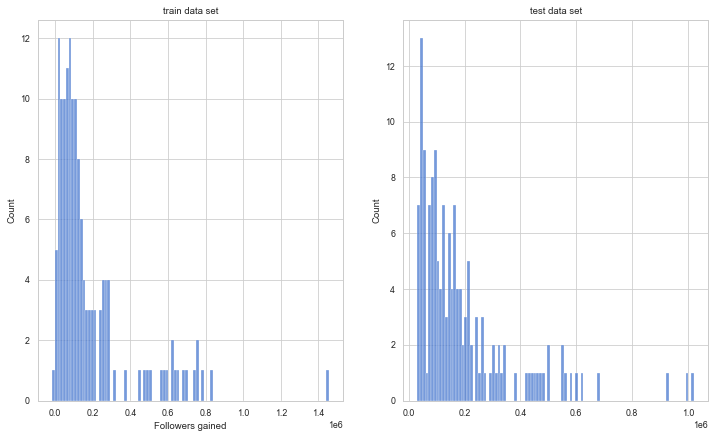

In [136]:
#visualization of the predicted data
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,7)
sns.histplot(y_test, ax = ax1, bins = 100) 
ax1.set(title = 'train data set')
sns.histplot(best_y_pred, ax = ax2, bins = 100) 
ax2.set(title = 'test data set')

### Submit

In [137]:
#check prediction
ex_pred = best_random.predict(ex_input_scaled1)
channel = df2['Channel'].tolist()

df_content = {'Channel': channel, 'Followers gained': ex_pred}

final_df = pd.DataFrame(df_content)
pd.options.display.float_format= '{:,.0f}'.format
final_df

,Channel,Followers gained
0,97R8L3J0,"384,786"
1,6UV44QFF,"123,119"
2,2WKQZUGR,"181,686"
3,R4DGVX2D,"179,486"
4,P8YSNIOI,"125,207"
...,...,...
195,8Q556ABI,"436,993"
196,AXQ2XZ45,"139,003"
197,AP7UE7SZ,"95,702"
198,PNCBWRE4,"230,494"


In [138]:
final_df.columns

Index(['Channel', 'Followers gained'], dtype='object')

In [139]:
#export "final_df" as excel file
final_df.to_csv('final_pred_LEE,Jooran.csv', index=False, header = 1)

In [140]:
#final submission file should be in a similar format as below:
final_ex = pd.read_csv('sample submission.csv')
final_ex

,Channel,Followers gained
0,97R8L3J0,0
1,6UV44QFF,0
2,2WKQZUGR,0
3,R4DGVX2D,0
4,P8YSNIOI,0
...,...,...
195,8Q556ABI,0
196,AXQ2XZ45,0
197,AP7UE7SZ,0
198,PNCBWRE4,0
